# Data Import, Visualization, and Troubleshooting with Python

**Expected study time :** 45 min (depending on your background)

**Learning outcomes :**

*Adapt an existing Python script in google colab in order to:*
- Load data from your geosensor
- Import data into Python
- Visualize the data
- Refine and export figures for presentation
- Perform basic statistics to support a scientific finding 

**External References**
- the Scipy.stat module https://docs.scipy.org/doc/scipy/reference/stats.html
- Matplotlib cheat sheet https://github.com/matplotlib/cheatsheets



# 1.   Load Packages

First step is to import Python libraries to analyse and visualise data. We will use

*   NumPy - mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more
*   MatPlotLib - comprehensive library for creating static, animated, and interactive visualizations in Python
*   Pandas - fast, powerful, flexible and easy to use open source data analysis and manipulation tool
*   Scipy - algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems
*   Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics




In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns



# 2.   Load Data 


Make sure that your data makes sense. 
Check that the dates imported correctly. 
Look at the header and variable names. 

If you import from github, make sure that you are using the "raw" prefix after the https://   ... 
On google Colab, you also can upload local files.  To do that, click on the "file" icon on the left side and then the file with an arrow on it. 

Look at the header to make sure you data lines up correctly.   




In [138]:
temp = pd.read_csv('https://raw.githubusercontent.com/nattycep/FIL_Geosensing/main/temp.csv')
temp.head()

# in this data file -> each component of date was its own column, so it imported as an interger.  We need to convert it to date. 

,year,month,day,hour,minute,second,temperature
0,2022,8,18,17,18,25,23.76739
1,2022,8,18,17,18,26,26.10811
2,2022,8,18,17,18,27,26.10811
3,2022,8,18,17,18,28,26.10811
4,2022,8,18,17,18,29,26.57626


Your data is now a "data frame".  But to make it easier to work with, let's:   
1. Make a single data vector for each variable by extracting columns from the table

In [139]:
temperature = temp['temperature'].astype(int)
#temperature = temperature.astype(int)
print(temperature)

0      23
1      26
2      26
3      26
4      26
       ..
564    26
565    26
566    26
567    26
568    26
Name: temperature, Length: 569, dtype: int64


2. Delete the successfully extracted colums


In [140]:
del temp["temperature"]
print(temp)

     year  month  day  hour  minute  second
0    2022      8   18    17      18      25
1    2022      8   18    17      18      26
2    2022      8   18    17      18      27
3    2022      8   18    17      18      28
4    2022      8   18    17      18      29
..    ...    ...  ...   ...     ...     ...
564  2022      8   18    17      28      20
565  2022      8   18    17      28      21
566  2022      8   18    17      28      22
567  2022      8   18    17      28      23
568  2022      8   18    17      28      25

[569 rows x 6 columns]


3. Parsing the remaining columns (date and time) into a datetime vector.  This method expects columns to have headings of minimally "year", "month", day"

In [141]:
datetime = pd.to_datetime(temp) #converting to a date time is key 
print(datetime.min()) # allows you to use special functions
print(datetime.max())
print(np.timedelta64(datetime.max()-datetime.min(),'m')) # declare the untis

2022-08-18 17:18:25
2022-08-18 17:28:25
10 minutes


Now we can transform this data into a time series and two value series. 

Here's an easy one -> But I still had to troubleshoot the header: 

In [142]:
temps = pd.read_csv('https://raw.githubusercontent.com/nattycep/FIL_Geosensing/main/Datalog_geosensorik.csv')
print(temps.head())
temps_dt = temps.loc[:, ["Year",	"Month",	"Day",	"Hour",	"Minute",	"Seconds"]]
T_datetime = pd.to_datetime(temps_dt)
T_ambient =temps["Ambient_Temperature"]
T_object =temps["Object_Temperature"]

del(temps)
del(temps_dt)

   Day  Month  Year  Hour  Minute  Seconds  Ambient_Temperature  \
0   31      8  2022    24      53       11                24.13   
1   31      8  2022    24      53       12                24.13   
2   31      8  2022    24      53       13                24.13   
3   31      8  2022    24      53       15                24.11   
4   31      8  2022    24      53       16                24.13   

   Object_Temperature  
0               22.89  
1               22.71  
2               22.87  
3               22.77  
4               22.65  


Now let's test your test data

1.  I manually uploaded the files, then right clicked to copy path


In [143]:
Klima1 = pd.read_csv('/content/Datalog_1 2-1.csv')
print(Klima1.head())

Klima2 = pd.read_csv('/content/Datalog_1 2.csv')
print(Klima2.head())

Klima3 = pd.read_csv('/content/Datalog_1.csv')
print(Klima3.head())

Bridge = pd.read_csv('/content/Results_OverNightTest.csv') 
#On first try, I got this error: 'utf-8' codec can't decode byte 0xb0 in position 19: invalid start byte
# if I look, there is a funny character: Date,CO2(ppm),Temp(∞C),CarCount
# I cheated and just changed it. 
print(Bridge.head())

Water = pd.read_csv('/content/water.csv', delimiter=";") # on my first try, I didn't notice the deliminator was not ","
print(Water.head())


       Time  Temperature in C  Humidity in %    Light
0   11:45:5             24.59          53.73  33448.0
1  11:45:10             24.70          53.33  31495.0
2  11:45:15             24.77          53.75  27398.0
3  11:45:20             24.86          53.06  32423.0
4  11:45:25             24.97          54.03  32327.0
       Time  Temperature in C  Humidity in %    Light
0   11:45:5             24.59          53.73  33448.0
1  11:45:10             24.70          53.33  31495.0
2  11:45:15             24.77          53.75  27398.0
3  11:45:20             24.86          53.06  32423.0
4  11:45:25             24.97          54.03  32327.0
       Time  Temperature in C  Humidity in %    Light
0   11:38:2             23.56          55.07  32359.0
1   11:38:7             23.54          54.89  32215.0
2  11:38:12             23.53          54.91  32311.0
3  11:38:17             23.50          54.93  32551.0
4  11:38:22             23.47          54.96  32231.0
               Date  CO2(ppm

Water: 
1. Make the date into a date time




In [144]:
#Water.columns= Water.columns.str.lower()
print(Water.columns) # the spaces at the beginning of the header names are causeing problems. Later the periods might also
headers = Water.columns.str.replace(' ','')
Water.columns = headers
headers = Water.columns.str.replace('.','')
Water.columns = headers
print(Water.columns)

Water['datetime']=pd.to_datetime(Water.iloc[:,[0,1,2,3,4,5]])

print(Water.head())
print(Water.dtypes)




Index(['Day', ' Month', ' Year', ' Hour', ' Minute', ' Second', ' Temp. Air 1',
       'Temp. Water 1', 'Temp. Water 2', 'Temp. Water 3 '],
      dtype='object')
Index(['Day', 'Month', 'Year', 'Hour', 'Minute', 'Second', 'TempAir1',
       'TempWater1', 'TempWater2', 'TempWater3'],
      dtype='object')
   Day  Month  Year  Hour  Minute  Second  TempAir1  TempWater1  TempWater2  \
0    2      9  2022    11       2      40   20.6875        21.0     20.9375   
1    2      9  2022    11       2      43   20.6875        21.0     20.9375   
2    2      9  2022    11       2      46   20.6875        21.0     20.9375   
3    2      9  2022    11       2      49   20.6875        21.0     20.9375   
4    2      9  2022    11       2      52   20.6875        21.0     20.9375   

   TempWater3            datetime  
0     20.8125 2022-09-02 11:02:40  
1     20.8125 2022-09-02 11:02:43  
2     20.8125 2022-09-02 11:02:46  
3     20.8125 2022-09-02 11:02:49  
4     20.8125 2022-09-02 11:02:52  
Day 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


All: 
1. Check that the date is correct
- see that bridge starts 1/1/2021


In [145]:
print(Bridge.dtypes)
Bridge['datetime']=pd.to_datetime(Bridge.Date)
print(Bridge.head())

Date         object
CO2(ppm)    float64
Temp(C)     float64
CarCount      int64
dtype: object
               Date  CO2(ppm)  Temp(C)  CarCount            datetime
0  01/01/2021 00:01    485.24    25.72         6 2021-01-01 00:01:00
1  01/01/2021 00:02    471.67    26.11         7 2021-01-01 00:02:00
2  01/01/2021 00:03    465.65    26.34         5 2021-01-01 00:03:00
3  01/01/2021 00:04    461.04    26.52         3 2021-01-01 00:04:00
4  01/01/2021 00:05    455.59    26.64         3 2021-01-01 00:05:00


- no date for Klima data


Klima: 

1.   Merge the 3 data sources according to time


In [146]:
#print(Klima1.dtypes)
Klima1['datetime']=pd.to_datetime(Klima1.Time) # assumed that it was today
#print(Klima1.dtypes)
#print(Klima1.head())
Klima2['datetime']=pd.to_datetime(Klima2.Time) # assumed that it was today
Klima3['datetime']=pd.to_datetime(Klima3.Time) # assumed that it was today

# to merge,first need unique column names

#print(Klima1.columns)
#print(Klima2.columns)
#print(Klima3.columns)


Klima1.rename(columns={'Time1':'Time'}, inplace=True)
Klima1.rename(columns={'Temp1':'Temperature in C'}, inplace=True)
Klima1.rename(columns={'Humid1':'Humidity in %'}, inplace=True)
Klima1.rename(columns={'Light1':'Light'}, inplace=True)
Klima1.rename(columns={'datetime1':'datetime'}, inplace=True)


Klima2.rename(columns={'Time2':'Time'}, inplace=True)
Klima2.rename(columns={'Temp2':'Temperature in C'}, inplace=True)
Klima2.rename(columns={'Humid2':'Humidity in %'}, inplace=True)
Klima2.rename(columns={'Light2':'Light'}, inplace=True)
Klima2.rename(columns={'datetime2':'datetime'}, inplace=True)

Klima3.rename(columns={'Time3':'Time'}, inplace=True)
Klima3.rename(columns={'Temp3':'Temperature in C'}, inplace=True)
Klima3.rename(columns={'Humid3':'Humidity in %'}, inplace=True)
Klima3.rename(columns={'Light3':'Light'}, inplace=True)
Klima3.rename(columns={'datetime3':'datetime'}, inplace=True)

Klima12 = pd.merge(Klima1,Klima2, on='datetime', how='outer').sort_values(by='datetime').fillna(method='ffill')
Klima = pd.merge(Klima12,Klima3, on='datetime', how='outer').sort_values(by='datetime').fillna(method='ffill')

print(Klima.head())

del Klima1 
del Klima2 
del Klima3 
del Klima12

   Time_x  Temperature in C_x  Humidity in %_x  Light_x            datetime  \
10    NaN                 NaN              NaN      NaN 2022-09-04 11:38:02   
11    NaN                 NaN              NaN      NaN 2022-09-04 11:38:07   
12    NaN                 NaN              NaN      NaN 2022-09-04 11:38:12   
13    NaN                 NaN              NaN      NaN 2022-09-04 11:38:17   
14    NaN                 NaN              NaN      NaN 2022-09-04 11:38:22   

   Time_y  Temperature in C_y  Humidity in %_y  Light_y      Time  \
10    NaN                 NaN              NaN      NaN   11:38:2   
11    NaN                 NaN              NaN      NaN   11:38:7   
12    NaN                 NaN              NaN      NaN  11:38:12   
13    NaN                 NaN              NaN      NaN  11:38:17   
14    NaN                 NaN              NaN      NaN  11:38:22   

    Temperature in C  Humidity in %    Light  
10             23.56          55.07  32359.0  
11             2


For our example plots, let's work with some meteo suisse data from this weekend.  

*   ten-minute resolution
*   two stations: 
    *     NABBER    Bern / Bollwerk 
    *     BER       Bern / Zollikofen
*   two variables
    *     tre200s0,  ∞C Air temperature 2 m above ground; current value
    *     rre150z0, mm  Precipitation; ten minutes total



In [147]:
path = "https://raw.githubusercontent.com/nattycep/FIL_Geosensing/main/order_105725_data.txt"
ms = pd.read_csv(path, delimiter= ";")
ms.time= pd.to_datetime(ms['time'].astype(str),errors='raise',format='%Y%m%d%H%M')
ms.stn = ms['stn'].astype('category')
print(ms.head())
print(ms.dtypes)




      stn                time  tre200s0  rre150z0
0  NABBER 2022-09-01 00:00:00      15.3       0.0
1  NABBER 2022-09-01 00:10:00      15.3       0.0
2  NABBER 2022-09-01 00:20:00      15.3       0.0
3  NABBER 2022-09-01 00:30:00      15.3       0.0
4  NABBER 2022-09-01 00:40:00      15.3       0.0
stn               category
time        datetime64[ns]
tre200s0           float64
rre150z0           float64
dtype: object


Maybe we want to pivot this, to make a single row for each time


In [148]:
temperature = ms.pivot(index='time', columns='stn', values='tre200s0')
rain = ms.pivot(index='time', columns='stn', values='rre150z0')

print(temperature.head())
print(rain.head())


stn                   BER  NABBER
time                             
2022-09-01 00:00:00  14.2    15.3
2022-09-01 00:10:00  14.0    15.3
2022-09-01 00:20:00  13.8    15.3
2022-09-01 00:30:00  13.9    15.3
2022-09-01 00:40:00  13.7    15.3
stn                  BER  NABBER
time                            
2022-09-01 00:00:00  0.0     0.0
2022-09-01 00:10:00  0.0     0.0
2022-09-01 00:20:00  0.0     0.0
2022-09-01 00:30:00  0.0     0.0
2022-09-01 00:40:00  0.0     0.0


# 3.   Make Figures: Preliminary, Refine, Export

Start with looking at each variable independently.  For example, a histogram of one variable and a line of another. 

Remember to always label your axes. 



Text(0.5, 0, 'datetime')

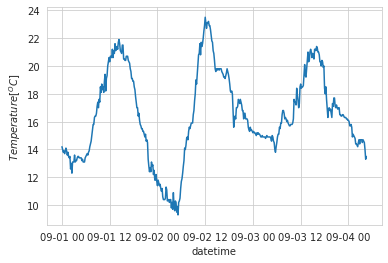

In [149]:
plt.plot(temperature.BER)
plt.ylabel("$ Temperature [^OC]$")
plt.xlabel("datetime")

A histogram is the most useful plot for seeing the first distribution of the data. Here are two different ways to visualize the histogram, for our two different time series. 

Note: to get superscript in matplotlib axes labels, use dollar signs that signal equation mode around a carrot (^). Subscripts would be around an underscore (_), and greek similarly need dollar signs but then a back slash followed by the name of the letter (capitalized for the capital version).  i.e.:
```
plt.ylabel("$ \Delta _{temperature} [^OC]$")
```




Text(0, 0.5, ' temperature [$^OC$]')

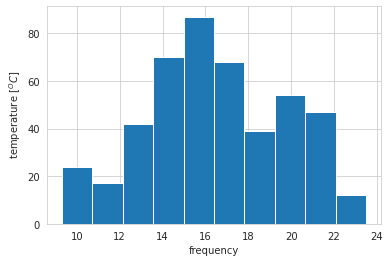

In [150]:
plt.hist(temperature.BER)
plt.xlabel("frequency")
plt.ylabel(" temperature [$^OC$]")

Or basically the same, just called a little differently: 

Text(0.5, 0, '$temperature ^OC$')

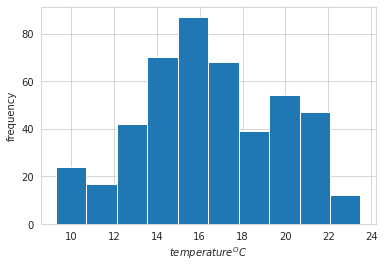

In [151]:
fig, ax = plt.subplots()
ax.hist(temperature.BER)
plt.ylabel("frequency")
plt.xlabel("$temperature ^OC$")


Or if there are two variables, we can see how their distributions compare. 

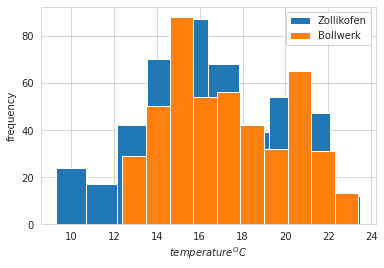

In [152]:
fig, ax = plt.subplots()
ax.hist(temperature.BER)
ax.hist(temperature.NABBER)
plt.ylabel("frequency")
plt.xlabel("$temperature ^OC$")
ax.legend(labels = {'Zollikofen', 'Bollwerk'})

#NABBER Bern / Bollwerk
#BER Bern / Zollikofen

#plt.hist(norm.rvs(0,1,5000))  # depending on your bins, you see differnet structure. how to decide on binning? 
# doesn't make sense to have bins that are smaller than the accuracy of your data, i.e. 1 cm. 
# let python decide
# plot with correct uncertainty bars (the best)
#plt.hist(norm.rvs(0,1,5000), bins=15)  # depending on your bins, you see differnet structure. how to decide on binning? 

Maybe we want to make them transparent 

[ 9.3  10.72 12.14 13.56 14.98 16.4  17.82 19.24 20.66 22.08 23.5 ]
16.496304347826086
17.32217391304348


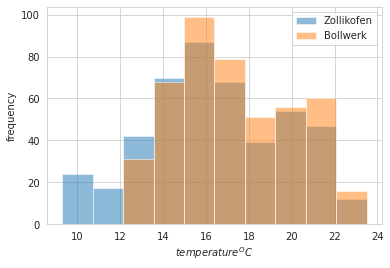

In [153]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(temperature.BER, alpha=.5, edgecolor='white') # so that we can match the bins
print(bins)
ax.hist(temperature.NABBER, alpha=.5, bins = bins, edgecolor='white') # here we use the same bins
plt.ylabel("frequency")
plt.xlabel("$temperature ^OC$")
ax.legend(labels = {'Zollikofen', 'Bollwerk'})

print(temperature.BER.mean())
print(temperature.NABBER.mean())


3.1 Time Series

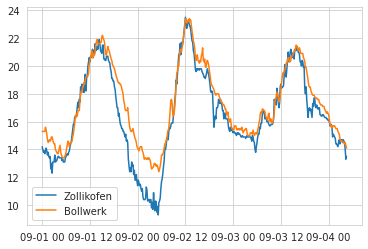

In [154]:
fig, ax = plt.subplots()
ax.plot(temperature.BER)
ax.plot(temperature.NABBER)
ax.legend(labels = {'Zollikofen', 'Bollwerk'})
fig.show()

Change the marker

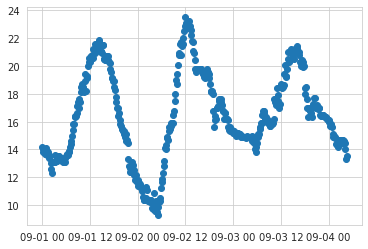

In [155]:
fig, ax = plt.subplots()
ax.plot(temperature.BER, 'o')
fig.show()




Perhaps we want to add a bined function to this figure and make the original data transparent. For this, use grouupby. Another option would be to use scipy binned statistic 

In [156]:
# note in this concatted data, the index is the time, but in your data it might be a different column, or another variable. 

temperature.index.min()
temperature.index.max()

temp6=temperature.groupby(temperature.index.floor('6H')).mean() #anotheroption would 30min or 1D (day)
temp6s=temperature.groupby(temperature.index.floor('6H')).std()

Let's plot these resampled values and add an error bar. 

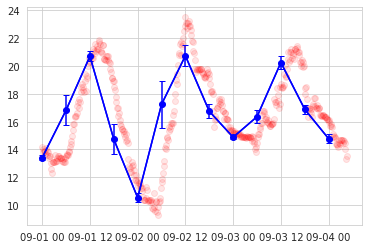

In [157]:

fig, ax = plt.subplots()
ax.plot(temperature.BER, 'ro', alpha=0.1)
ax.plot(temp6.BER, 'bo-');
ax.errorbar(x=temp6.index, y=temp6.BER, yerr=temp6s.BER/2, color='b', capsize=3);  # add error bars

fig.show()


# note at the 6 hour time step, this isn't so nice.  We really should shift the dates by 3 hours so that the mean points are in the middle. 

Perhaps instead of a moving average, we want to fit a function to the data. 

First a linear function. 

Let's start by changing our x-variable to a deltatime

In [158]:
dt = temperature.index -temperature.index.min()
dtemp = temperature
dtemp.index = dt
print(dtemp.head())

stn               BER  NABBER
time                         
0 days 00:00:00  14.2    15.3
0 days 00:10:00  14.0    15.3
0 days 00:20:00  13.8    15.3
0 days 00:30:00  13.9    15.3
0 days 00:40:00  13.7    15.3


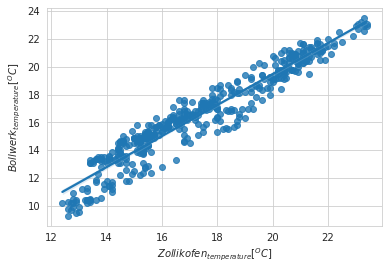

In [159]:
#linear fit


fig, ax = plt.subplots()
plt.ylabel("$Bollwerk_{temperature} [^OC]$")
plt.xlabel("$Zollikofen_{temperature} [^OC]$")
p= sns.regplot(data=dtemp, x=dtemp.NABBER.values, y=dtemp.BER.values);

fig.show()

Note that regplot makes a it a bit tricky to get the equations, but you can figure them out 

In [161]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())

print(slope)
print(intercept)
print(r_value)
print(p_value)
print(std_err)


1.114649917051953
-2.8118553675073237
0.9999999999999999
0.0
1.6778207570239026e-09


We could make this more interesting by seeing if the relationship varies according to a categorical variable, say if it is raining in either place. 

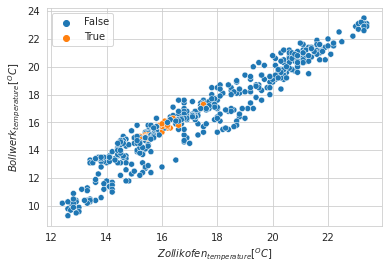

In [162]:
israining = (rain.BER+rain.NABBER)>0

fig, ax = plt.subplots()
plt.ylabel("$Bollwerk_{temperature} [^OC]$")
plt.xlabel("$Zollikofen_{temperature} [^OC]$")
p= sns.scatterplot(data=dtemp, x=dtemp.NABBER.values, y=dtemp.BER.values, hue =israining);

fig.show()

Boxplots


[1 2]


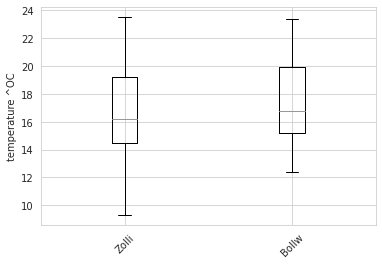

In [163]:

fig, ax = plt.subplots()
ax.boxplot([dtemp.BER, dtemp.NABBER])
plt.ylabel("temperature ^OC")
locs, labels = plt.xticks()  # Get the current locations and labels.
print(locs)
plt.xticks(locs, ['Zolli', 'Bollw'],rotation=45)  # Set text labels and properties.
fig.show()


# Save your figure

In [135]:
fig.savefig("mydatavis.png", dpi=300)

fig.savefig("mydavavis.pdf")


# 4.  Perform Statistical Tests 


5. Save your data

In [172]:
temperature.to_csv('export_test.csv', index=False, sep=';')